# Import data set

In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
# Loan_ID : Unique Loan ID

# Gender : Male/ Female

# Married : Applicant married (Y/N)

# Dependents : Number of dependents

# Education : Applicant Education (Graduate/ Under Graduate)

# Self_Employed : Self employed (Y/N)

# ApplicantIncome : Applicant income

# CoapplicantIncome : Coapplicant income

# LoanAmount : Loan amount in thousands of dollars

# Loan_Amount_Term : Term of loan in months

# Credit_History : Credit history meets guidelines yes or no

# Property_Area : Urban/ Semi Urban/ Rural

# Loan_Status : Loan approved (Y/N) this is the target variable

### 1. Display Top 5 Rows of The Dataset

In [3]:
loan_df = pd.read_csv('loan.csv')
loan_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 2. Check Last 5 Rows of The Dataset

In [4]:
loan_df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
loan_df.shape[0]

614

In [6]:
loan_df.shape[1]

13

### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 5. Check Null Values In The Dataset

In [8]:
# loan_df.isnull().sum()
percentage_null = (loan_df.isnull().sum() / len(loan_df)) * 100
percentage_null

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [9]:
# Task 1: Drop the 'Loan_ID' column
loan_df = loan_df.drop('Loan_ID', axis=1)

### 6. Handling The missing Values

In [10]:
# Task 2: delete the entire row if the missing datais < 5% in the column
columns = ["Gender", "Married", "Dependents", "LoanAmount", "Loan_Amount_Term"]
loan_df = loan_df.dropna(subset=columns)

In [11]:
# Task 3: Impute missing values if > 5% missing rows
(loan_df.isnull().sum()/len(loan_df))*100

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [12]:
loan_df['Credit_History'].unique() # doesnt give how much nulls there are

array([ 1.,  0., nan])

In [13]:
loan_df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
loan_df['Credit_History'].value_counts() 

Credit_History
1.0    434
0.0     71
Name: count, dtype: int64

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
# columns_to_impute = ['Self_Employed', 'Credit_History']
# loan_df[columns_to_impute] = imputer.fit_transform(loan_df[columns_to_impute])
loan_imputed = imputer.fit_transform(loan_df) # this will work, but you have to do the above if multiple to impute

In [31]:
# Check if missing values are handled
pd.DataFrame(loan_df).isnull().sum()

# loan_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [32]:
loan_imputed

array([['Male', 'Yes', '1', ..., 1.0, 'Rural', 'N'],
       ['Male', 'Yes', '0', ..., 1.0, 'Urban', 'Y'],
       ['Male', 'Yes', '0', ..., 1.0, 'Urban', 'Y'],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 'Urban', 'Y'],
       ['Male', 'Yes', '2', ..., 1.0, 'Urban', 'Y'],
       ['Female', 'No', '0', ..., 0.0, 'Semiurban', 'N']], dtype=object)

### 7. Handling Categorical Columns

In [39]:
loan_df = pd.DataFrame(loan_df, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                                         'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                                         'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'])

loan_df.replace({'Gender': {'Male': 0, 'Female': 1},
                 'Married': {'No': 0, 'Yes': 1},
                 'Education': {'Not Graduate': 0, 'Graduate': 1},
                 'Self_Employed': {'No': 0, 'Yes': 1},
                 'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
                 'Loan_Status': {'N': 0, 'Y': 1}}, inplace=True)
loan_df.head()

C:\Users\E1005238\AppData\Local\Temp\ipykernel_25324\2513074855.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_df.replace({'Gender': {'Male': 0, 'Female': 1},


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [41]:
loan_df["Dependents"].replace({'3+': 4}, inplace=True)

In [42]:
loan_df["Dependents"].value_counts()

Dependents
0    316
1     96
2     96
4     45
Name: count, dtype: int64

In [43]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             553 non-null    int64 
 1   Married            553 non-null    int64 
 2   Dependents         553 non-null    object
 3   Education          553 non-null    int64 
 4   Self_Employed      553 non-null    int64 
 5   ApplicantIncome    553 non-null    object
 6   CoapplicantIncome  553 non-null    object
 7   LoanAmount         553 non-null    object
 8   Loan_Amount_Term   553 non-null    object
 9   Credit_History     553 non-null    object
 10  Property_Area      553 non-null    int64 
 11  Loan_Status        553 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 52.0+ KB


In [44]:
loan_df['Dependents'] = loan_df['Dependents'].astype('int')
loan_df['Credit_History'] = loan_df['Credit_History'].astype('int')

In [46]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,4583,1508.0,128.0,360.0,1,0,0
1,0,1,0,1,1,3000,0.0,66.0,360.0,1,2,1
2,0,1,0,0,0,2583,2358.0,120.0,360.0,1,2,1
3,0,0,0,1,0,6000,0.0,141.0,360.0,1,2,1
4,0,1,2,1,1,5417,4196.0,267.0,360.0,1,2,1


# Bar graph - Education vs Loan Status (Graduate?)

<Axes: xlabel='Education', ylabel='count'>

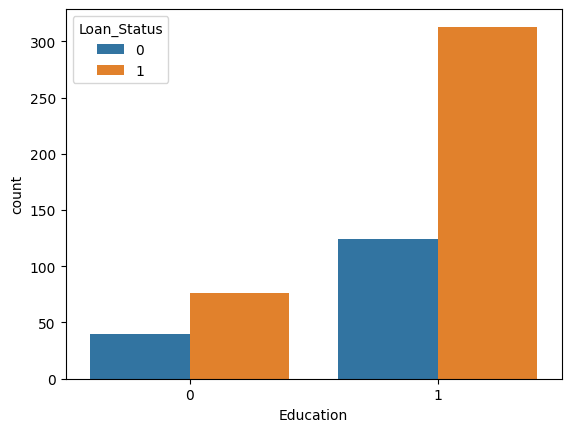

In [59]:
import seaborn as sns

loan_df.groupby(["Education", "Loan_Status"]).size()
sns.countplot(data=loan_df, x="Education", hue="Loan_Status")

# Bar graph - Married vs Loan Status (output)

<Axes: xlabel='Married', ylabel='count'>

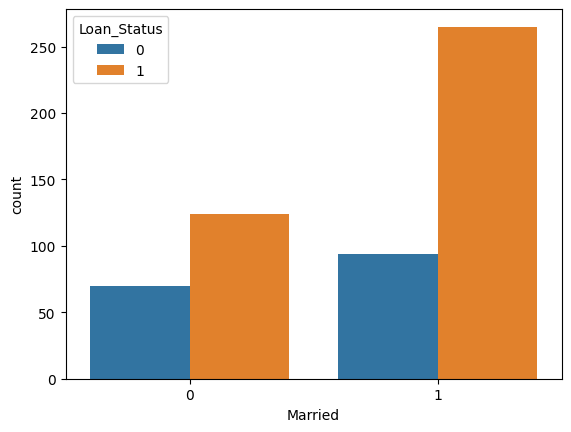

In [60]:
import seaborn as sns

loan_df.groupby(["Married", "Loan_Status"]).size()
sns.countplot(data=loan_df, x="Married", hue="Loan_Status")

### 8. Store Feature In X And Response (Target)  y

In [61]:
features = loan_df.drop(columns=['Loan_Status'], axis=1)


In [67]:
target_df = loan_df['Loan_Status']

### 9. Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [65]:
pd.DataFrame(features_scaled)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.481275,0.735112,0.127481,0.515215,-0.386896,-0.128694,-0.049699,-0.214368,0.279961,0.383801,-1.307359
1,-0.481275,0.735112,-0.701896,0.515215,2.584677,-0.394296,-0.545638,-0.952675,0.279961,0.383801,1.251825
2,-0.481275,0.735112,-0.701896,-1.940938,-0.386896,-0.464262,0.229842,-0.309634,0.279961,0.383801,1.251825
3,-0.481275,-1.360337,-0.701896,0.515215,-0.386896,0.109057,-0.545638,-0.059562,0.279961,0.383801,1.251825
4,-0.481275,0.735112,0.956858,0.515215,2.584677,0.011239,0.834309,1.440866,0.279961,0.383801,1.251825
...,...,...,...,...,...,...,...,...,...,...,...
548,2.077813,-1.360337,-0.701896,0.515215,-0.386896,-0.411075,-0.545638,-0.893134,0.279961,0.383801,-1.307359
549,-0.481275,0.735112,2.615613,0.515215,-0.386896,-0.208727,-0.545638,-1.262287,-2.468292,0.383801,-1.307359
550,-0.481275,0.735112,0.127481,0.515215,-0.386896,0.456706,-0.466709,1.274152,0.279961,0.383801,1.251825
551,-0.481275,0.735112,0.956858,0.515215,-0.386896,0.374659,-0.545638,0.488213,0.279961,0.383801,1.251825


### 10. Splitting The Dataset Into The Training Set And Test Set 

In [68]:
from sklearn.model_selection import train_test_split

# 1. split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_df, test_size=0.2, random_state=42)

### 11. Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() #  2. choose model
model.fit(X_train, y_train) # 3. train

predict = model.predict(X_test) # 4. predict
predict

y_test # 5. actual output - metrics

548    1
82     1
523    1
332    0
132    1
      ..
140    1
149    1
498    0
153    0
172    1
Name: Loan_Status, Length: 111, dtype: int64